In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from PIL import Image
from glob import glob

In [2]:
female=glob('./Data/crop/female_crop/*.png')
male=glob('./Data/crop/male_crop/*.png')

In [3]:
path=female+male

In [4]:
def getSize(path):
    img=Image.open(path)
    return img.size[0]

In [5]:
df=pd.DataFrame(data=path,columns=['path'])
df.head()

,path
0,./Data/crop/female_crop\female_0.png
1,./Data/crop/female_crop\female_1.png
2,./Data/crop/female_crop\female_100.png
3,./Data/crop/female_crop\female_1003.png
4,./Data/crop/female_crop\female_1008.png


In [6]:
df['size']=df['path'].apply(getSize)

In [7]:
df.head()

,path,size
0,./Data/crop/female_crop\female_0.png,273
1,./Data/crop/female_crop\female_1.png,182
2,./Data/crop/female_crop\female_100.png,182
3,./Data/crop/female_crop\female_1003.png,182
4,./Data/crop/female_crop\female_1008.png,81


In [8]:
df.tail()

,path,size
6053,./Data/crop/male_crop\male_989.png,182
6054,./Data/crop/male_crop\male_99.png,273
6055,./Data/crop/male_crop\male_991.png,122
6056,./Data/crop/male_crop\male_995.png,182
6057,./Data/crop/male_crop\male_999.png,273


# EDA

In [9]:
df.describe()

,size
count,6058.000000
mean,153.960548
std,71.251833
min,24.000000
25%,81.000000
50%,122.000000
75%,182.000000
max,410.000000


<AxesSubplot:>

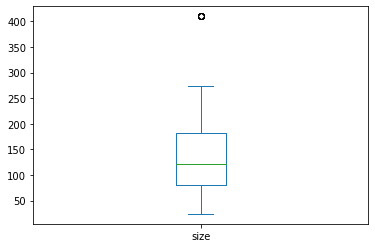

In [10]:
df['size'].plot(kind='box')

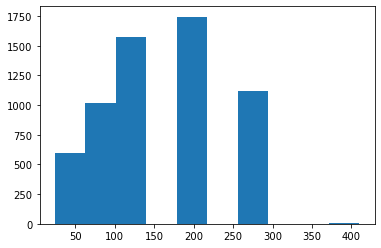

In [11]:
plt.hist(df['size'],bins=10)
plt.show()

# So from analyis , I will resize all the images in 100x100 from and remove images with size <=54

In [12]:
df_new=df[df['size']>54]

In [13]:
df_new

,path,size
0,./Data/crop/female_crop\female_0.png,273
1,./Data/crop/female_crop\female_1.png,182
2,./Data/crop/female_crop\female_100.png,182
3,./Data/crop/female_crop\female_1003.png,182
4,./Data/crop/female_crop\female_1008.png,81
...,...,...
6053,./Data/crop/male_crop\male_989.png,182
6054,./Data/crop/male_crop\male_99.png,273
6055,./Data/crop/male_crop\male_991.png,122
6056,./Data/crop/male_crop\male_995.png,182


In [14]:
string=df_new['path'][0]
def gender(string):
    try:
        
        return string.split('_')[0].split('/')[-1]
    except:
        return none

In [15]:
df['gender']=df['path'].apply(gender)

In [16]:
df['gender'].value_counts()

female    3590
male      2468
Name: gender, dtype: int64

<AxesSubplot:ylabel='gender'>

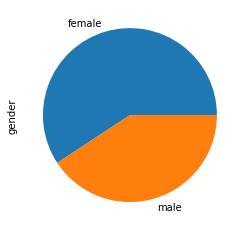

In [17]:
df['gender'].value_counts().plot(kind='pie')

In [18]:
df['gender'].value_counts(normalize='True')

female    0.592605
male      0.407395
Name: gender, dtype: float64

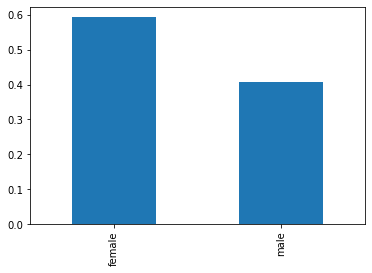

In [19]:
df['gender'].value_counts(normalize='True').plot(kind='bar')
plt.show()

#### 1. 60% images are of female and rest 40% are of male
#### 2. All the image sizes are greater than or equal to 81.
#### Conclusion: Resizing all the images in df_new to 100x100 array

In [20]:
df_new.min()

path    ./Data/crop/female_crop\female_0.png
size                                      81
dtype: object

# Resize image

In [21]:
def resize_img(path_to_resize):
    try:
        #step 1:read image
        img=cv2.imread(path_to_resize)
        #step 2:convert into gray scale
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        #step 3:resize into 100x100 array
        size=gray.shape[0]
        if size>=100:#shrink
                     gray_re=cv2.resize(gray,(100,100),cv2.INTER_AREA)
        else:#enlarge
                     gray_re=cv2.resize(gray,(100,100),cv2.INTER_CUBIC)
        #step 4:flatten image(1x10,000)
        return gray_re.flatten()

    except:
        return None
    
        

In [22]:
len(resize_img(path[0]))

10000

In [23]:
df_new['gender']=df_new['path'].apply(gender)
df_new.head()

C:\Users\raj_j\AppData\Local\Temp/ipykernel_45296/1236878667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['gender']=df_new['path'].apply(gender)


,path,size,gender
0,./Data/crop/female_crop\female_0.png,273,female
1,./Data/crop/female_crop\female_1.png,182,female
2,./Data/crop/female_crop\female_100.png,182,female
3,./Data/crop/female_crop\female_1003.png,182,female
4,./Data/crop/female_crop\female_1008.png,81,female


In [24]:
df_new['structure_data']=df_new['path'].apply(resize_img)

C:\Users\raj_j\AppData\Local\Temp/ipykernel_45296/2774523342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['structure_data']=df_new['path'].apply(resize_img)


In [25]:
df_new

,path,size,gender,structure_data
0,./Data/crop/female_crop\female_0.png,273,female,"[188, 180, 184, 188, 173, 179, 192, 178, 216, ..."
1,./Data/crop/female_crop\female_1.png,182,female,"[32, 24, 32, 27, 29, 29, 29, 32, 36, 30, 46, 8..."
2,./Data/crop/female_crop\female_100.png,182,female,"[22, 30, 39, 36, 30, 61, 11, 17, 10, 19, 13, 1..."
3,./Data/crop/female_crop\female_1003.png,182,female,"[35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 3..."
4,./Data/crop/female_crop\female_1008.png,81,female,"[86, 86, 71, 54, 45, 49, 33, 20, 18, 23, 27, 2..."
...,...,...,...,...
6053,./Data/crop/male_crop\male_989.png,182,male,"[31, 31, 31, 31, 31, 31, 31, 31, 30, 29, 29, 3..."
6054,./Data/crop/male_crop\male_99.png,273,male,"[88, 41, 33, 18, 15, 14, 13, 29, 25, 74, 114, ..."
6055,./Data/crop/male_crop\male_991.png,122,male,"[25, 25, 26, 25, 26, 31, 35, 46, 60, 114, 195,..."
6056,./Data/crop/male_crop\male_995.png,182,male,"[21, 27, 31, 24, 19, 24, 21, 19, 31, 36, 15, 2..."


In [26]:
df1=df_new['structure_data'].apply(pd.Series)


In [27]:
df2=pd.concat((df_new['gender'],df1),axis=1)

In [28]:
df2.head()

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,188,180,184,188,173,179,192,178,216,...,109,111,115,116,122,116,119,120,117,111
1,female,32,24,32,27,29,29,29,32,36,...,58,47,27,33,22,28,22,36,62,17
2,female,22,30,39,36,30,61,11,17,10,...,156,171,177,186,176,185,186,190,177,177
3,female,35,35,35,35,35,35,35,35,35,...,75,82,90,92,86,70,89,84,84,74
4,female,86,86,71,54,45,49,33,20,18,...,35,34,32,32,30,32,34,34,33,30


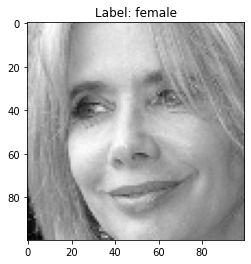

In [29]:
plt.imshow(df2.loc[0][1:].values.reshape(100,100).astype('int'),cmap='gray')
plt.title("Label: "+df2.loc[0]['gender'])
plt.show()

In [30]:
import pickle
pickle.dump(df2,open('./Data/dataframe_images_100_100.pickle','wb'))

In [31]:
df=pickle.load(open('./Data/dataframe_images_100_100.pickle','rb'))

In [32]:
df.head()

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,188,180,184,188,173,179,192,178,216,...,109,111,115,116,122,116,119,120,117,111
1,female,32,24,32,27,29,29,29,32,36,...,58,47,27,33,22,28,22,36,62,17
2,female,22,30,39,36,30,61,11,17,10,...,156,171,177,186,176,185,186,190,177,177
3,female,35,35,35,35,35,35,35,35,35,...,75,82,90,92,86,70,89,84,84,74
4,female,86,86,71,54,45,49,33,20,18,...,35,34,32,32,30,32,34,34,33,30


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5461 entries, 0 to 6057
Columns: 10001 entries, gender to 9999
dtypes: object(1), uint8(10000)
memory usage: 52.2+ MB


In [34]:
df.isnull().sum()

gender    0
0         0
1         0
2         0
3         0
         ..
9995      0
9996      0
9997      0
9998      0
9999      0
Length: 10001, dtype: int64

## Data Preprocessing


#### Remove Missing values
#### Data Normalization (min max scaling)

In [35]:
df.dropna(axis=0,inplace=True)

In [36]:
df.isnull().sum()

gender    0
0         0
1         0
2         0
3         0
         ..
9995      0
9996      0
9997      0
9998      0
9999      0
Length: 10001, dtype: int64

In [37]:
#Split into two parts
X=df.iloc[:,1:].values #independent featues
y=df.iloc[:,0].values #dependent

In [38]:
X.shape

(5461, 10000)

# MinMax Scaling
## Xnorm=$\frac{x-minValue}{maxValue-minValue}$

In [39]:
X.min(),X.max()

(0, 255)

In [40]:
Xnorm=(X-0)/(255-0)

In [41]:
Xnorm

array([[0.7372549 , 0.70588235, 0.72156863, ..., 0.47058824, 0.45882353,
        0.43529412],
       [0.1254902 , 0.09411765, 0.1254902 , ..., 0.14117647, 0.24313725,
        0.06666667],
       [0.08627451, 0.11764706, 0.15294118, ..., 0.74509804, 0.69411765,
        0.69411765],
       ...,
       [0.09803922, 0.09803922, 0.10196078, ..., 0.11764706, 0.12156863,
        0.13333333],
       [0.08235294, 0.10588235, 0.12156863, ..., 0.07843137, 0.08627451,
        0.09803922],
       [0.01568627, 0.01176471, 0.00784314, ..., 0.35294118, 0.35294118,
        0.36470588]])

In [42]:
Xnorm.shape

(5461, 10000)

In [43]:
y

array(['female', 'female', 'female', ..., 'male', 'male', 'male'],
      dtype=object)

In [44]:
#female=1,male=0
y_norm=np.where(y=='female',1,0)
y_norm

array([1, 1, 1, ..., 0, 0, 0])

In [45]:
#save x and y in numpy zip
np.savez('./Data/data_10000_norm.npz',Xnorm,y_norm)